In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split

import functions.ml_functions as ml
import functions.misc_functions as misc
import functions.metrics as mtr
import pylab

datasets with a 1 are buckingham street  
datasets with a 2 are kilmainham gaol

In [154]:
ten1 = pd.read_csv('data/ten_min.csv')
ten2 = pd.read_csv('data/ten_min_2.csv')
thirty1 = pd.read_csv('data/thirty_min.csv')
thirty2 = pd.read_csv('data/thirty_min_2.csv')
sixty1 = pd.read_csv('data/sixty_min.csv')
sixty2 = pd.read_csv('data/sixty_min_2.csv')

In [155]:
df1 = ten1
df2 = ten2
df3 = thirty1
df4 = thirty2
df5 = sixty1
df6 = sixty2

In [156]:
df5

,Unnamed: 0,AVAILABLE BIKES,t,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,B60,B65,B70,B75,B80,DB1,DB2,DDB1DB2
0,16,20,0.055556,0,1,0,0,0,0,0,23,23,23,23,23,0,0,0
1,17,20,0.059028,0,1,0,0,0,0,0,22,23,23,23,23,1,0,-1
2,18,19,0.062500,0,1,0,0,0,0,0,22,22,23,23,23,0,1,1
3,19,18,0.065972,0,1,0,0,0,0,0,22,22,22,23,23,0,0,0
4,20,17,0.069444,0,1,0,0,0,0,0,22,22,22,22,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,17986,14,0.982639,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17971,17987,14,0.986111,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17972,17988,14,0.989583,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17973,17989,14,0.993056,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0


In [157]:
def stack_features(df:pd.DataFrame):
    X1 = df.iloc[:, 2]
    X2 = df.iloc[:, 3]
    X3 = df.iloc[:, 4]
    X4 = df.iloc[:, 5]
    X5 = df.iloc[:, 6]
    X6 = df.iloc[:, 7]
    X7 = df.iloc[:,8]
    X8 = df.iloc[:, 9]
    X9 = df.iloc[:, 10]
    X10 = df.iloc[:, 11]
    X11 = df.iloc[:, 12]
    X12 = df.iloc[:,13]
    X13 = df.iloc[:, 14]
    X14 = df.iloc[:, 15]
    X15 = df.iloc[:,16]
    X16 = df.iloc[:, 17]
    X = np.column_stack((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16))

    Y = df.iloc[:, 1]
    return X, Y

In [158]:
X1, Y1 =stack_features(df1) 
X2, Y2 = stack_features(df2)
X3, Y3 =stack_features(df3) 
X4, Y4 = stack_features(df4)
X5, Y5 =stack_features(df5) 
X6, Y6 = stack_features(df6)


In [159]:
print(Y3)

0        23
1        23
2        22
3        22
4        22
         ..
17976    14
17977    14
17978    14
17979    14
17980    14
Name: AVAILABLE BIKES, Length: 17981, dtype: int64


In [160]:
def train_Kfold_ridge(X_features, y_features, c_value):
    """
    Uses K-fold cross validation 
    Parameters
    ----------
    X_features : array 
        features
    y_features : array
        target features
    c_value : float
        parameter for training
    Returns
    ----------
    mean error : float
    standard error : float
    """
    kf = KFold(n_splits=5)
    model = Ridge(alpha=1/(2*c_value))
    errs = []
    # model = linear_model.Lasso(alpha=1/(2*c_value), max_iter=1000000000).fit()
    for train, test in kf.split(X_features):
        model.fit(X_features[train],y_features[train])
        ypred = model.predict(X_features[test])
        from sklearn.metrics import mean_squared_error
        # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
        errs.append(mean_squared_error(y_features[test],ypred))
    # print(np.mean(errs))
    return np.mean(errs), np.std(errs)

C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14593e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02525e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46265e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


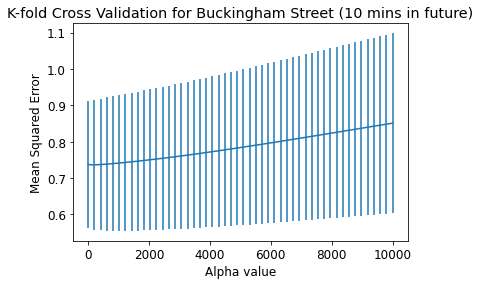

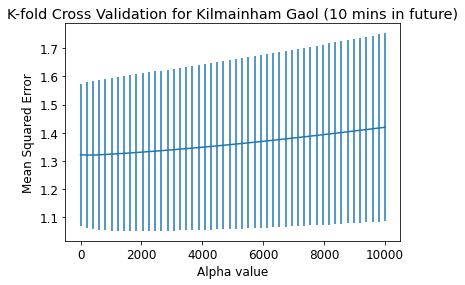

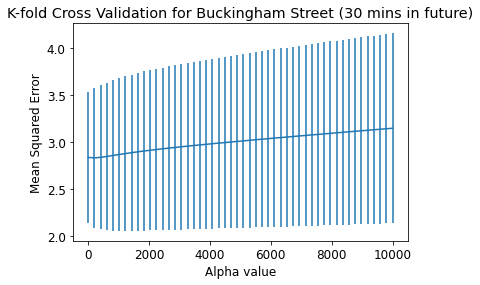

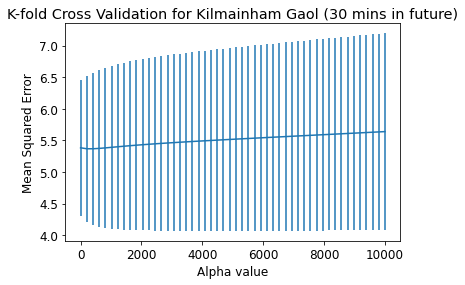

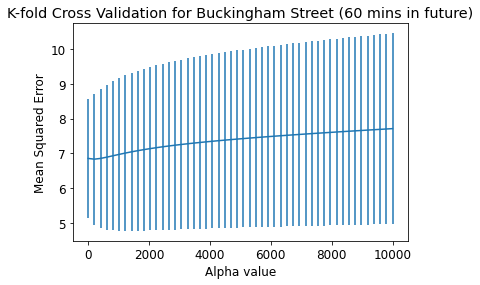

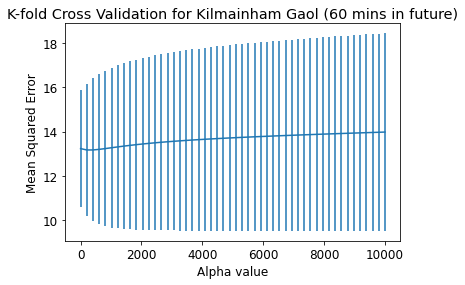

In [161]:
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X1, Y1, alphas,'K-fold Cross Validation for Buckingham Street (10 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X2, Y2, alphas,'K-fold Cross Validation for Kilmainham Gaol (10 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X3, Y3, alphas,'K-fold Cross Validation for Buckingham Street (30 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X4, Y4, alphas,'K-fold Cross Validation for Kilmainham Gaol (30 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X5, Y5, alphas,'K-fold Cross Validation for Buckingham Street (60 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X6, Y6, alphas,'K-fold Cross Validation for Kilmainham Gaol (60 mins in future)')


minimised by (around) 1 for all

It seems like they all have more or less the exact same curve  - this was a bug  
when looking closer the further into the future values will undoubtedly have worse performance

I now feel that I can use the same model for all 6 datasets,  
Changing alpha has minimal difference

In [162]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.3, random_state=42)

In [163]:
model1 = Ridge(alpha=1).fit(X1_train,y1_train)
predictions1 = ml.generate_predictions(model1, X1_test)
mse1 = mtr.calculate_mse(predictions1,y1_test)
r21 = mtr.calculate_R2(predictions1,y1_test)
train_predictions1 = ml.generate_predictions(model1, X1_train)
train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

model2 = Ridge(alpha=1).fit(X2_train,y2_train)
predictions2 = ml.generate_predictions(model2, X2_test)
mse2 = mtr.calculate_mse(predictions2,y2_test)
r22 = mtr.calculate_R2(predictions2,y2_test)
train_predictions2 = ml.generate_predictions(model2, X2_train)
train_mse2 = mtr.calculate_mse(train_predictions2,y2_train)

model3 = Ridge(alpha=1).fit(X3_train,y3_train)
predictions3 = ml.generate_predictions(model3, X3_test)
mse3 = mtr.calculate_mse(predictions3,y3_test)
r23 = mtr.calculate_R2(predictions3,y3_test)
train_predictions3 = ml.generate_predictions(model3, X3_train)
train_mse3 = mtr.calculate_mse(train_predictions3,y3_train)

model4 = Ridge(alpha=1).fit(X4_train,y4_train)
predictions4 = ml.generate_predictions(model4, X4_test)
mse4 = mtr.calculate_mse(predictions4,y4_test)
r24 = mtr.calculate_R2(predictions4,y4_test)
train_predictions4 = ml.generate_predictions(model4, X4_train)
train_mse4 = mtr.calculate_mse(train_predictions4,y4_train)

model5 = Ridge(alpha=1).fit(X5_train,y5_train)
predictions5 = ml.generate_predictions(model5, X5_test)
mse5 = mtr.calculate_mse(predictions5,y5_test)
r25 = mtr.calculate_R2(predictions5,y5_test)
train_predictions5 = ml.generate_predictions(model5, X5_train)
train_mse5 = mtr.calculate_mse(train_predictions5,y5_train)

model6 = Ridge(alpha=1).fit(X6_train,y6_train)
predictions6 = ml.generate_predictions(model6, X6_test)
mse6 = mtr.calculate_mse(predictions6,y6_test)
r26 = mtr.calculate_R2(predictions6,y6_test)
train_predictions6 = ml.generate_predictions(model6, X6_train)
train_mse6 = mtr.calculate_mse(train_predictions6,y6_train)

In [164]:
train_mse1

0.7111361993403266

In [165]:
print(f"mse 1: {mse1}, training mse = {train_mse1}, r_2 = {r21}")
print(f"mse 2: {mse2}, training mse = {train_mse2}, r_2 = {r22}")
print(f"mse 3: {mse3}, training mse = {train_mse3}, r_2 = {r23}")
print(f"mse 4: {mse4}, training mse = {train_mse4}, r_2 = {r24}")
print(f"mse 5: {mse5}, training mse = {train_mse5}, r_2 = {r25}")
print(f"mse 6: {mse6}, training mse = {train_mse6}, r_2 = {r26}")


mse 1: 0.778038465888961, training mse = 0.7111361993403266, r_2 = 0.9903718113651032
mse 2: 1.2274603642388036, training mse = 1.3463263914695562, r_2 = 0.9889462270079143
mse 3: 2.8980902949976604, training mse = 2.7341336117216026, r_2 = 0.9643255775106485
mse 4: 5.009085323957655, training mse = 5.3626240244899, r_2 = 0.9548703947190639
mse 5: 7.206380333828185, training mse = 6.352380868560422, r_2 = 0.9100266256969147
mse 6: 12.814869517454902, training mse = 12.61676477518761, r_2 = 0.884801972168538


Dummy Predictor should just be the most recent value

In [166]:
dummy_preds_1 = X1_test[:,8]
dummy_mse_1 = mtr.calculate_mse(dummy_preds_1,y1_test)
dummy_r21 = mtr.calculate_R2(dummy_preds_1,y1_test)
dummy_preds_2 = X2_test[:,8]
dummy_mse_2 = mtr.calculate_mse(dummy_preds_2,y2_test)
dummy_r22 = mtr.calculate_R2(dummy_preds_2,y2_test)
dummy_preds_3 = X3_test[:,8]
dummy_mse_3 = mtr.calculate_mse(dummy_preds_3,y3_test)
dummy_r23 = mtr.calculate_R2(dummy_preds_3,y3_test)
dummy_preds_4 = X4_test[:,8]
dummy_mse_4 = mtr.calculate_mse(dummy_preds_4,y4_test)
dummy_r24 = mtr.calculate_R2(dummy_preds_4,y4_test)
dummy_preds_5 = X5_test[:,8]
dummy_mse_5 = mtr.calculate_mse(dummy_preds_5,y5_test)
dummy_r25 = mtr.calculate_R2(dummy_preds_5,y5_test)
dummy_preds_6 = X6_test[:,8]
dummy_mse_6 = mtr.calculate_mse(dummy_preds_6,y6_test)
dummy_r26 = mtr.calculate_R2(dummy_preds_6,y6_test)

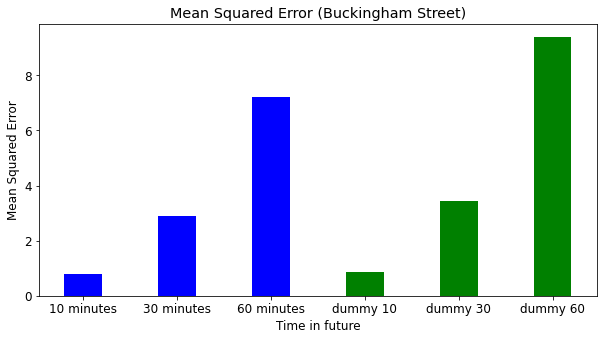

In [167]:
data1 = {'10 minutes':mse1, '30 minutes':mse3, '60 minutes':mse5}
data2 = {'dummy 10':dummy_mse_1, 'dummy 30':dummy_mse_3, 'dummy 60':dummy_mse_5}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.4)

plt.bar(keys2, values2, color ='green',
        width = 0.4)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Buckingham Street)")
plt.show()

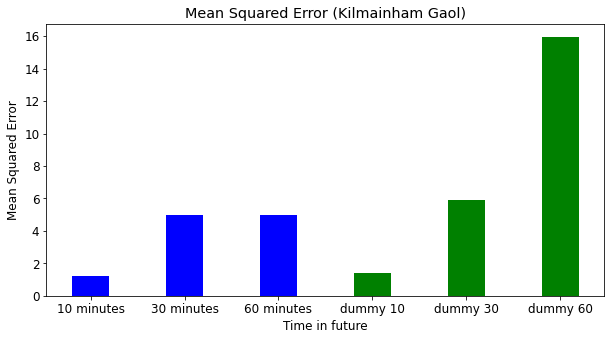

In [168]:
data1 = {'10 minutes':mse2, '30 minutes':mse4, '60 minutes':mse4}
data2 = {'dummy 10':dummy_mse_2, 'dummy 30':dummy_mse_4, 'dummy 60':dummy_mse_6}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.4)

plt.bar(keys2, values2, color ='green',
        width = 0.4)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Kilmainham Gaol)")
plt.show()

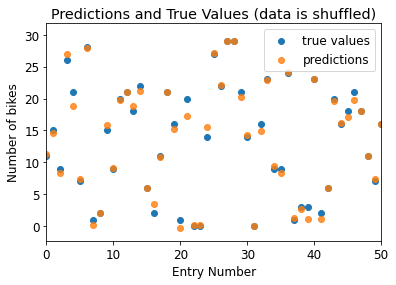

In [169]:
x = range(len(y1_test))
plt.figure("Predictions")
plt.scatter(x,y1_test, label= 'true values', )
plt.scatter(x,predictions1, label= 'predictions', alpha = 0.8)
plt.title('Predictions and True Values (data is shuffled)')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 50)
plt.legend()

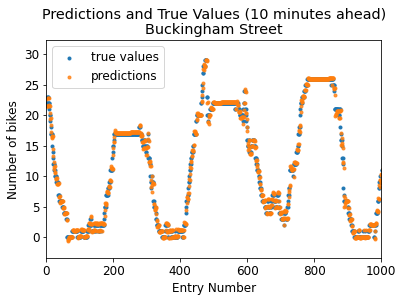

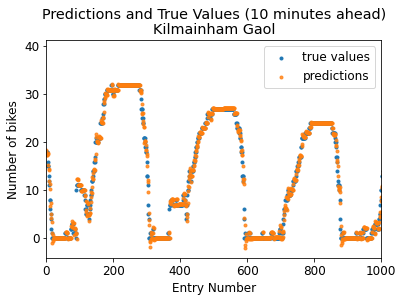

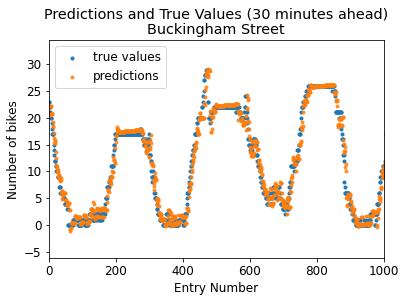

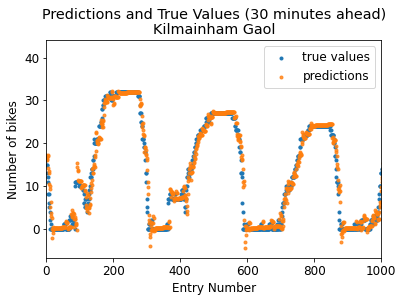

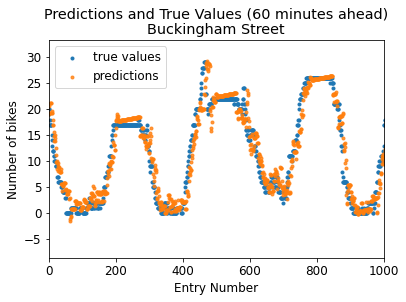

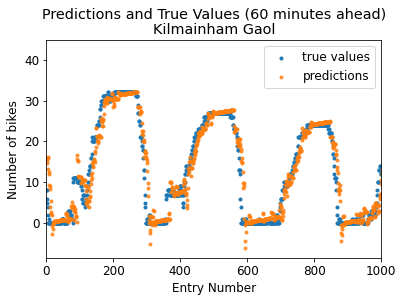

In [170]:
plt.figure('preds1')
preds = ml.generate_predictions(model1, X1)
x = range(len(preds))
plt.scatter(x,Y1, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (10 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds2')
preds = ml.generate_predictions(model2, X2)
x = range(len(preds))
plt.scatter(x,Y2, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (10 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds3')
preds = ml.generate_predictions(model3, X3)
x = range(len(preds))
plt.scatter(x,Y3, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (30 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds4')
preds = ml.generate_predictions(model4, X4)
x = range(len(preds))
plt.scatter(x,Y4, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (30 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds5')
preds = ml.generate_predictions(model5, X5)
x = range(len(preds))
plt.scatter(x,Y5, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (60 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds6')
preds = ml.generate_predictions(model6, X6)
x = range(len(preds))
plt.scatter(x,Y6, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (60 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

### Redo with polynomial features.

In [171]:
polyX1 = misc.make_poly_data(X1, 2)
polyX2 = misc.make_poly_data(X2, 2)
polyX3 = misc.make_poly_data(X3, 2)
polyX4 = misc.make_poly_data(X4, 2)
polyX5 = misc.make_poly_data(X5, 2)
polyX6 = misc.make_poly_data(X6, 2)

In [172]:
X1_train, X1_test, y1_train, y1_test = train_test_split(polyX1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(polyX2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(polyX3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(polyX4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(polyX5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(polyX6, Y6, test_size=0.3, random_state=42)

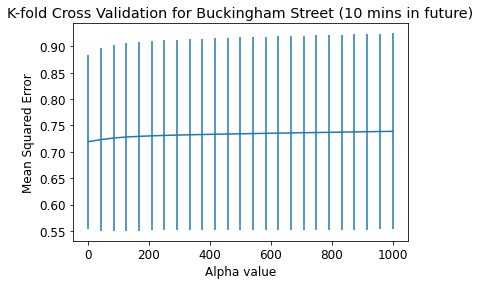

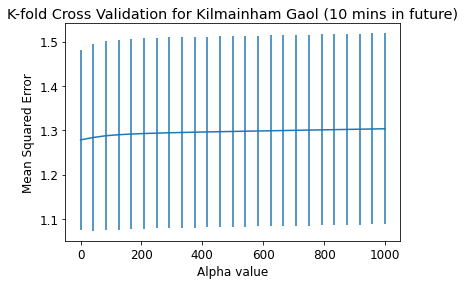

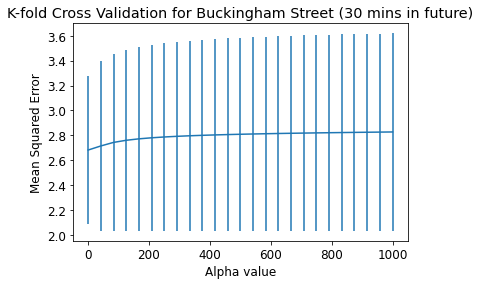

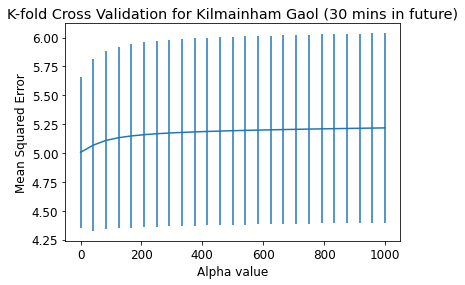

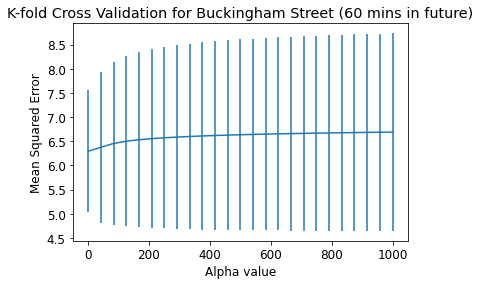

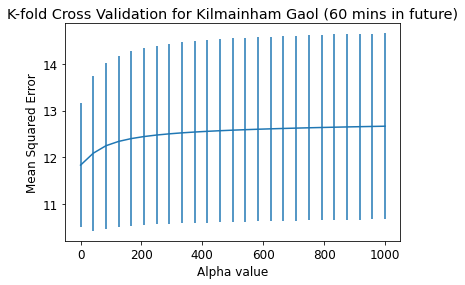

In [173]:
alphas = np.linspace(0.00000000001, 1000,num=25)
ml.Kfold_for_alpha_ridge(polyX1,Y1,alphas, 'K-fold Cross Validation for Buckingham Street (10 mins in future)')

ml.Kfold_for_alpha_ridge(polyX2,Y2,alphas, 'K-fold Cross Validation for Kilmainham Gaol (10 mins in future)')

ml.Kfold_for_alpha_ridge(polyX3,Y3,alphas, 'K-fold Cross Validation for Buckingham Street (30 mins in future)')

ml.Kfold_for_alpha_ridge(polyX4,Y4,alphas, 'K-fold Cross Validation for Kilmainham Gaol (30 mins in future)')

ml.Kfold_for_alpha_ridge(polyX5,Y5,alphas, 'K-fold Cross Validation for Buckingham Street (60 mins in future)')

ml.Kfold_for_alpha_ridge(polyX6,Y6,alphas, 'K-fold Cross Validation for Kilmainham Gaol (60 mins in future)')

In [174]:
poly_model1 = Ridge(alpha=1).fit(X1_train,y1_train)
poly_predictions1 = ml.generate_predictions(poly_model1, X1_test)
poly_mse1 = mtr.calculate_mse(predictions1,y1_test)
poly_train_predictions1 = ml.generate_predictions(poly_model1, X1_train)
poly_train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

poly_model2 = Ridge(alpha=1).fit(X2_train,y2_train)
poly_predictions2 = ml.generate_predictions(poly_model2, X2_test)
poly_mse2 = mtr.calculate_mse(predictions2,y2_test)
poly_train_predictions2 = ml.generate_predictions(poly_model2, X2_train)
poly_train_mse2 = mtr.calculate_mse(train_predictions2,y2_train)

poly_model3 = Ridge(alpha=1).fit(X3_train,y3_train)
poly_predictions3 = ml.generate_predictions(poly_model3, X3_test)
poly_mse3 = mtr.calculate_mse(predictions2,y2_test)
poly_train_predictions3 = ml.generate_predictions(poly_model3, X3_train)
poly_train_mse3 = mtr.calculate_mse(train_predictions3,y3_train)

poly_model4 = Ridge(alpha=1).fit(X4_train,y4_train)
poly_predictions4= ml.generate_predictions(poly_model4, X4_test)
poly_mse4 = mtr.calculate_mse(predictions4,y4_test)
poly_train_predictions4 = ml.generate_predictions(poly_model4, X4_train)
poly_train_mse4 = mtr.calculate_mse(train_predictions4,y4_train)

poly_model5 = Ridge(alpha=1).fit(X5_train,y5_train)
poly_predictions5= ml.generate_predictions(poly_model5, X5_test)
poly_mse5 = mtr.calculate_mse(predictions5,y5_test)
poly_train_predictions5 = ml.generate_predictions(poly_model5, X5_train)
poly_train_mse5 = mtr.calculate_mse(train_predictions5,y5_train)

poly_model6 = Ridge(alpha=1).fit(X6_train,y6_train)
poly_predictions6= ml.generate_predictions(poly_model6, X6_test)
poly_mse6 = mtr.calculate_mse(predictions6,y6_test)
poly_train_predictions6 = ml.generate_predictions(poly_model6, X6_train)
poly_train_mse6 = mtr.calculate_mse(train_predictions6,y6_train)

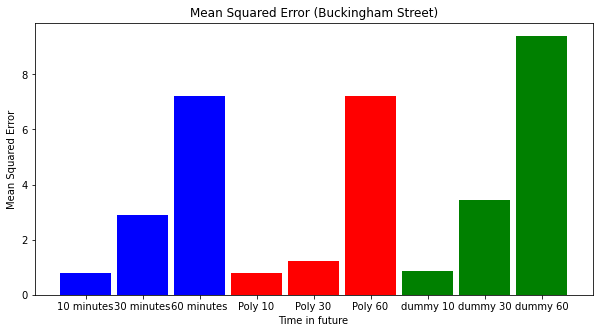

In [202]:
data1 = {'10 minutes':mse1, '30 minutes':mse3, '60 minutes':mse5}
data2 = {'Poly 10':poly_mse1, 'Poly 30':poly_mse3, 'Poly 60':poly_mse5}
data3 = {'dummy 10':dummy_mse_1, 'dummy 30':dummy_mse_3, 'dummy 60':dummy_mse_5}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
keys3 = list(data3.keys())
values3 = list(data3.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='red',
        width = 0.9)

plt.bar(keys3, values3, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Buckingham Street)")
plt.rc('font', size=10)
plt.show()


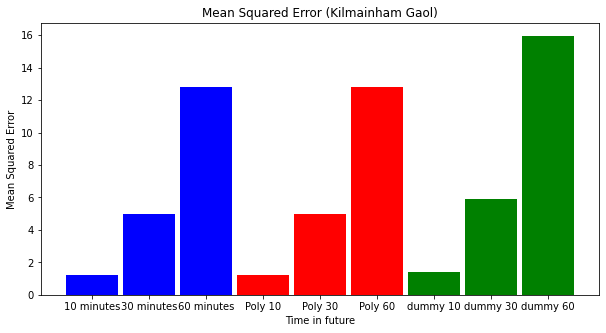

In [203]:
data1 = {'10 minutes':mse2, '30 minutes':mse4, '60 minutes':mse6}
data2 = {'Poly 10':poly_mse2, 'Poly 30':poly_mse4, 'Poly 60':poly_mse6}
data3 = {'dummy 10':dummy_mse_2, 'dummy 30':dummy_mse_4, 'dummy 60':dummy_mse_6}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
keys3 = list(data3.keys())
values3 = list(data3.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='red',
        width = 0.9)

plt.bar(keys3, values3, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Kilmainham Gaol)")

plt.show()

bar chart of coefficients

In [177]:
# model1.coef_
len(poly_model1.coef_)

153

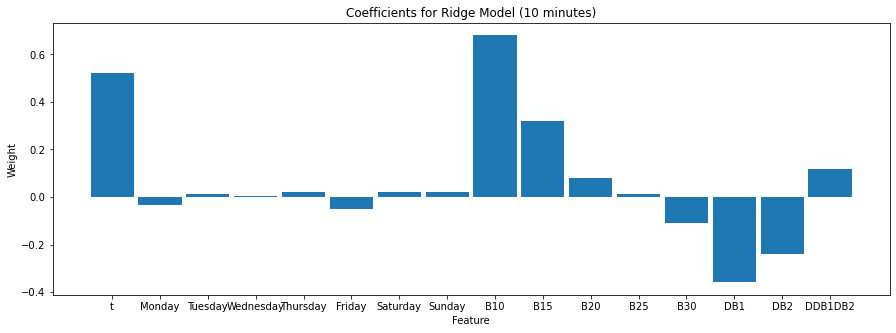

In [201]:
data = {'t':model1.coef_[0], 'Monday':model1.coef_[1], 'Tuesday':model1.coef_[2], 'Wednesday':model1.coef_[3], 'Thursday':model1.coef_[4],
'Friday':model1.coef_[5], 'Saturday':model1.coef_[6], 'Sunday':model1.coef_[7], 'B10':model1.coef_[8],'B15':model1.coef_[9], 'B20':model1.coef_[10],
'B25':model1.coef_[11], 'B30':model1.coef_[12], 'DB1':model1.coef_[13], 'DB2':model1.coef_[14], 'DDB1DB2':model1.coef_[15]}

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(list(data.keys()), list(data.values()),
        width = 0.9)

plt.title('Coefficients for Ridge Model (10 minutes)')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.rc('font', size=10)